<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/anomalias/src/Anomalias_palanquero_20h_7h_nuevodatospwv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install windrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import timedelta
import matplotlib.cm as cm
from functools import reduce
from math import cos, sin, atan, pi
from windrose import WindroseAxes
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_DADOS_EVENTOS = '/dados/'
PATH_ANOMALIAS = '/anomalias/'
NOMBRE_ESTACION = 'palanquero'
FILE_DATOS_ESTACION = 'eventos_palanquero_2.csv'

LISTA_VAR = ['temp', 'hum', 'pres']
LISTA_PWV = ['pwv']
LISTA_VAR_10M = ['viento']
LISTA_PREC = ['prec']

PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'
FILES_TRATADOS = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR]
FILES_PWV = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}_nuevo.csv' for VAR in LISTA_PWV]
FILES_TRATADOS_10M = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR_10M]
FILES_TRATADOS_PREC = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_PREC]

Cargando datos de Temp, Hum, Pres

In [5]:
dfList = []
for f in FILES_TRATADOS:
  df = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';', 
                )
  dfList.append(df)

In [6]:
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
df = df.sort_values(by=['FECHA']).reset_index(drop = True)
df['HORA'] = df['FECHA'].apply(lambda x: x[11:13])

Cargando datos de Vapor de Agua

In [4]:
dfList = []
PWV_columns = []
if FILES_PWV:
    
  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PWV_columns += [col for col in dfp if col != 'FECHA']


  dfPWV = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV = dfPWV.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PWV_columns:
    dfPWV = dfPWV.loc[~dfPWV[var].isnull()].reset_index(drop = True)

  dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPWV = pd.DataFrame(columns = ['FECHA'])

In [ ]:
dfPWV

,FECHA_HORA,PWV,FECHA
0,2011-01-01 00,48.363636,2011-01-01 00:00:00-05:00
1,2011-01-01 01,48.830909,2011-01-01 01:00:00-05:00
2,2011-01-01 02,49.322727,2011-01-01 02:00:00-05:00
3,2011-01-01 03,48.856667,2011-01-01 03:00:00-05:00
4,2011-01-01 09,46.832000,2011-01-01 09:00:00-05:00
...,...,...,...
40050,2017-12-31 19,52.679091,2017-12-31 19:00:00-05:00
40051,2017-12-31 20,53.769091,2017-12-31 20:00:00-05:00
40052,2017-12-31 21,55.295455,2017-12-31 21:00:00-05:00
40053,2017-12-31 22,56.664545,2017-12-31 22:00:00-05:00


## Datos de PWV sin agrupar por hora (Formato de 5 minutos)

In [7]:
dfList = []
PWV_columns = []
if FILES_PWV:
    
  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PWV_columns += [col for col in dfp if col != 'FECHA']


  dfPWV_5m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV_5m = dfPWV_5m.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV_5m['FECHA_HORA'] = dfPWV_5m['FECHA'].apply(lambda x: x[0:13])
  # dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PWV_columns:
    dfPWV_5m = dfPWV_5m.loc[~dfPWV_5m[var].isnull()].reset_index(drop = True)

  # dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

else:
  dfPWV_5m = pd.DataFrame(columns = ['FECHA'])

In [8]:
dfPWV_5m

,FECHA,PWV,FECHA_HORA
0,2011-01-01 00:00:00-05:00,48.13,2011-01-01 00
1,2011-01-01 00:05:00-05:00,48.16,2011-01-01 00
2,2011-01-01 00:10:00-05:00,48.19,2011-01-01 00
3,2011-01-01 00:15:00-05:00,48.20,2011-01-01 00
4,2011-01-01 00:20:00-05:00,48.25,2011-01-01 00
...,...,...,...
479210,2017-12-31 23:35:00-05:00,57.51,2017-12-31 23
479211,2017-12-31 23:40:00-05:00,57.53,2017-12-31 23
479212,2017-12-31 23:45:00-05:00,57.55,2017-12-31 23
479213,2017-12-31 23:50:00-05:00,57.57,2017-12-31 23


## Cargando datos de Vientos

$ \theta_p  = arctan(U_p / V_p) $ Direccíon del viento promedio

In [ ]:
dfList = []
for f in FILES_TRATADOS_10M:
  dfaux = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';', 
                )
  dfList.append(dfaux)

In [ ]:
df10m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)

df10m['FECHA_HORA'] = df10m['FECHA'].apply(lambda x: x[0:13])
df10m['X_VIENTO'] = df10m['VELVIENTO'] * np.sin(np.deg2rad(df10m['DIRECVIENTO'] - 180))
df10m['Y_VIENTO'] = df10m['VELVIENTO'] * np.cos(np.deg2rad(df10m['DIRECVIENTO'] - 180))

dfViento = df10m.copy()

df10m = df10m.groupby('FECHA_HORA').agg({'X_VIENTO' : 'mean', 'Y_VIENTO' : 'mean' }).reset_index()
df10m['HORA'] = df10m['FECHA_HORA'].apply(lambda x: x[11:13])
df10m['FECHA'] = pd.to_datetime(df10m['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

In [ ]:
df10m

,FECHA_HORA,X_VIENTO,Y_VIENTO,HORA,FECHA
0,2011-01-02 00,-0.020676,-0.144283,00,2011-01-02 00:00:00-05:00
1,2011-01-02 01,-0.010329,-0.114271,01,2011-01-02 01:00:00-05:00
2,2011-01-02 02,-0.004356,-0.133153,02,2011-01-02 02:00:00-05:00
3,2011-01-02 03,-0.013790,-0.164974,03,2011-01-02 03:00:00-05:00
4,2011-01-02 04,-0.002036,-0.116649,04,2011-01-02 04:00:00-05:00
...,...,...,...,...,...
41343,2017-12-31 17,0.627704,-1.636584,17,2017-12-31 17:00:00-05:00
41344,2017-12-31 19,-0.112232,0.016378,19,2017-12-31 19:00:00-05:00
41345,2017-12-31 20,-0.102170,0.407207,20,2017-12-31 20:00:00-05:00
41346,2017-12-31 21,0.194049,-0.179630,21,2017-12-31 21:00:00-05:00


## Cargando datos de precipitación

In [ ]:
dfList = []
PREC_columns = []
if FILES_TRATADOS_PREC:
    
  for f in FILES_TRATADOS_PREC:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PREC_columns += [col for col in dfp if col != 'FECHA']


  dfPrec = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPrec = dfPrec.sort_values(by=['FECHA']).reset_index(drop = True)

  # dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  # dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PREC_columns:
    dfPrec = dfPrec.loc[~dfPrec[var].isnull()].reset_index(drop = True)

  # dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPrec = pd.DataFrame(columns = ['FECHA'])



In [ ]:
dfPrec

,FECHA,PREC
0,2011-01-01 00:10:00-05:00,0.0
1,2011-01-01 00:20:00-05:00,0.0
2,2011-01-01 00:30:00-05:00,0.0
3,2011-01-01 00:40:00-05:00,0.0
4,2011-01-01 00:50:00-05:00,0.0
...,...,...
278100,2017-12-31 23:10:00-05:00,0.0
278101,2017-12-31 23:20:00-05:00,0.0
278102,2017-12-31 23:30:00-05:00,0.0
278103,2017-12-31 23:40:00-05:00,0.0


## Cruzamiento de datos de Temp, hum y pres con PWV

In [9]:
dfDatos = pd.merge(df[['FECHA', 'TEMP', 'HUM', 'PRESION']], dfPWV[['FECHA', 'PWV']], on = 'FECHA', how = 'outer')
dfDatos['HORA'] = dfDatos['FECHA'].apply(lambda x: x[11:13])

dfmean = dfDatos.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean.columns if col != 'HORA']
for col in columns_mean:
  dfmean = dfmean.rename(columns={col : f'{col}_mean'})

dfmean

,HORA,TEMP_mean,HUM_mean,PRESION_mean,PWV_mean
0,00,24.602023,93.996656,990.357252,55.665978
1,01,24.310280,94.871467,989.928955,55.365001
2,02,24.065277,95.213324,989.517105,54.820929
3,03,23.824669,95.952575,989.360551,54.352282
4,04,23.624545,95.860717,989.524463,53.935836
5,05,23.476396,96.446680,989.957486,53.615639
6,06,23.392489,96.118200,990.549096,53.493620
7,07,24.552886,94.378837,991.286165,53.355961
8,08,26.403856,86.492383,991.815086,53.046632
9,09,28.146848,79.125812,991.753458,52.836865


## Cargando Df de los eventos

In [10]:
dfEventos = pd.read_csv(PATH_DRIVE + PATH_DADOS_EVENTOS + FILE_DATOS_ESTACION, 
                 sep = ';'
                )
dfEventos = dfEventos.sort_values(by='date_min_t').reset_index(drop = True)
dfEventos['FECHA'] = pd.to_datetime(dfEventos['date_min_t'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')
dfEventos['FECHA_MIN'] = dfEventos['FECHA'].dt.round('10min')  
dfEventos['FECHA'] = dfEventos['FECHA'].dt.round('H')
dfEventos = dfEventos[['FECHA', 'FECHA_MIN', 'min_t', 'lon_t', 'lat_t']]
dfEventos

,FECHA,FECHA_MIN,min_t,lon_t,lat_t
0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627
1,2011-01-27 23:00:00-05:00,2011-01-27 23:20:00-05:00,224.2,-74.693,5.627
2,2011-02-03 23:00:00-05:00,2011-02-03 23:20:00-05:00,195.6,-74.836,5.627
3,2011-02-10 22:00:00-05:00,2011-02-10 21:40:00-05:00,212.6,-74.836,5.627
4,2011-03-23 00:00:00-05:00,2011-03-22 23:40:00-05:00,215.6,-74.836,5.341
...,...,...,...,...,...
148,2017-11-10 23:00:00-05:00,2017-11-10 23:20:00-05:00,208.2,-74.693,5.484
149,2017-11-11 00:00:00-05:00,2017-11-10 23:40:00-05:00,202.6,-74.836,5.341
150,2017-11-14 01:00:00-05:00,2017-11-14 00:40:00-05:00,196.1,-74.693,5.627
151,2017-12-02 22:00:00-05:00,2017-12-02 21:40:00-05:00,217.7,-74.836,5.484


# Cargando Eventos e encontrando intervalo n horas antes y después

In [24]:
funtime = lambda x, hour : [x + timedelta(hours = h) for h in (range(0, hour+1) if hour > 0 else range(hour, 0))]

# [base - datetime.timedelta(days=x) for x in range(numdays)]
dfEventAn = dfEventos.copy()
# pd.set_option('display.max_colwidth', None)

# ==================================
int_horas = 12
intervalo_minutes_samples_10m = 10
intervalo_minutes_samples_5m = 5
int_minutes = int_horas * 6 * intervalo_minutes_samples_10m
int_minutes_5m = int_horas * 12 * intervalo_minutes_samples_5m

# ==================================
dfEventAn['FECHA_ANTES'] = dfEventAn['FECHA'].apply(funtime, hour = -int_horas)
dfEventAn['FECHA_DESPUES'] = dfEventAn['FECHA'].apply(funtime, hour = int_horas)
dfEventAn['FECHA_INTERVALO'] = dfEventAn['FECHA_ANTES'] + dfEventAn['FECHA_DESPUES']
dfEventAn = dfEventAn.drop(columns=['FECHA_ANTES', 'FECHA_DESPUES']).explode('FECHA_INTERVALO')
dfEventAn['FECHA_POS'] = (dfEventAn['FECHA_INTERVALO'] - dfEventAn['FECHA'])/ pd.Timedelta(hours=1)
dfEventAn = dfEventAn.rename(columns={'FECHA' : 'FECHA_EVENTO', 'FECHA_INTERVALO': 'FECHA'}).reset_index()
dfEventAn['FECHA'] = dfEventAn['FECHA'].astype(str)


dfEventAn.head(15)

,index,FECHA_EVENTO,FECHA_MIN,min_t,lon_t,lat_t,FECHA,FECHA_POS
0,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:00:00-05:00,-12.0
1,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 13:00:00-05:00,-11.0
2,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 14:00:00-05:00,-10.0
3,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 15:00:00-05:00,-9.0
4,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 16:00:00-05:00,-8.0
5,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 17:00:00-05:00,-7.0
6,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 18:00:00-05:00,-6.0
7,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 19:00:00-05:00,-5.0
8,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 20:00:00-05:00,-4.0
9,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 21:00:00-05:00,-3.0


# Cruzamiento con las variables metereológicas. En terminos de 1h


In [12]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean'] 

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [13]:
dfAnomalia

FECHA_POS TEMP_anomalia           HUM_anomalia            PRESION_anomalia  \
                      mean       std         mean        std             mean   
0       -8.0      0.097695  1.566706    -2.175189  11.553260        -0.413251   
1       -7.0      0.130229  1.539353    -1.501843  15.497012        -0.472396   
2       -6.0      0.016897  1.439083    -0.876429  17.166028        -0.446527   
3       -5.0      0.009569  1.474488     0.250181  14.768517        -0.435123   
4       -4.0      0.232381  1.296713    -0.197344  13.967424        -0.433616   
5       -3.0      0.302860  1.117013    -0.677795  14.407847        -0.474608   
6       -2.0      0.533380  1.039454    -0.431727  10.586295        -0.471810   
7       -1.0      0.570127  1.026108    -1.073775   8.404288        -0.498092   
8        0.0      0.155154  1.238788    -2.170618  12.598257        -0.246994   
9        1.0     -0.312617  1.416204     0.112622   7.728286         0.001969   
10       2.0     -0.446265  1.300915    -2.471106  15.898998        -0.016469   
11       3.0     -0.438440  1.214046     0.065827   8.887505        -0.139804   
12       4.0     -0.521785  1.081397     0.065330  12.106336        -0.117449   
13       5.0     -0.454629  1.177246     1.198115   8.659345        -0.101115   
14       6.0     -0.445774  1.278364     0.787688  10.600297        -0.112955   
15       7.0     -0.558827  1.405032     2.013954  10.549514        -0.022756   
16       8.0     -0.607654  1.803717     3.204597  10.129782         0.037350   

             PWV_anomalia            
         std         mean       std  
0   1.253816     1.156687  4.176461  
1   1.235626     1.446599  4.102130  
2   1.200406     1.641852  4.037073  
3   1.193600     1.878727  3.890855  
4   1.211110     2.225582  3.723561  
5   1.272120     2.629478  3.479559  
6   1.352837     2.907790  3.414401  
7   1.417797     2.936183  3.184687  
8   1.559130     2.445758  3.214338  
9   1.582494     1.653158  3.316016  
10  1.625505     1.159806  3.352103  
11  1.517957     0.999921  3.452243  
12  1.602598     0.994657  3.498371  
13  1.550384     1.161338  3.644110  
14  1.476230     1.331165  3.736530  
15  1.482970     1.431784  3.768369  
16  1.599147     1.406485  3.724362

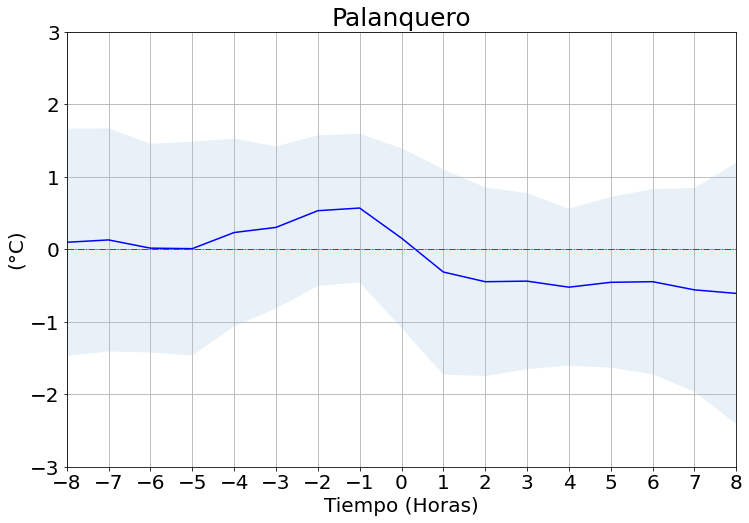

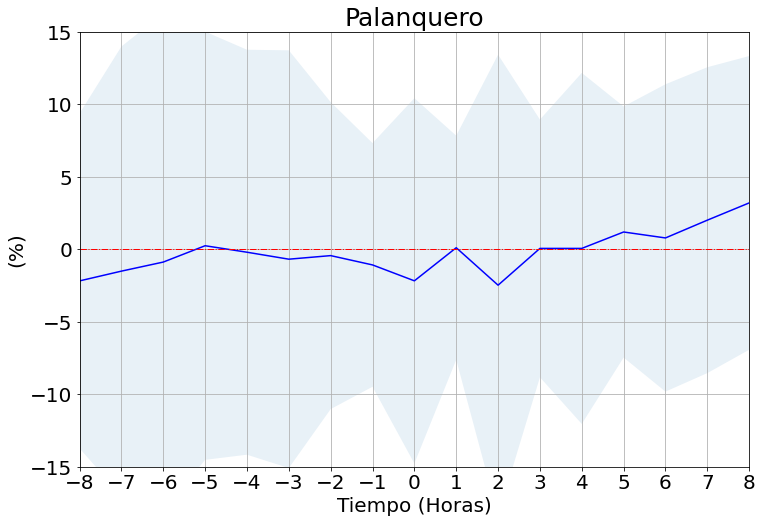

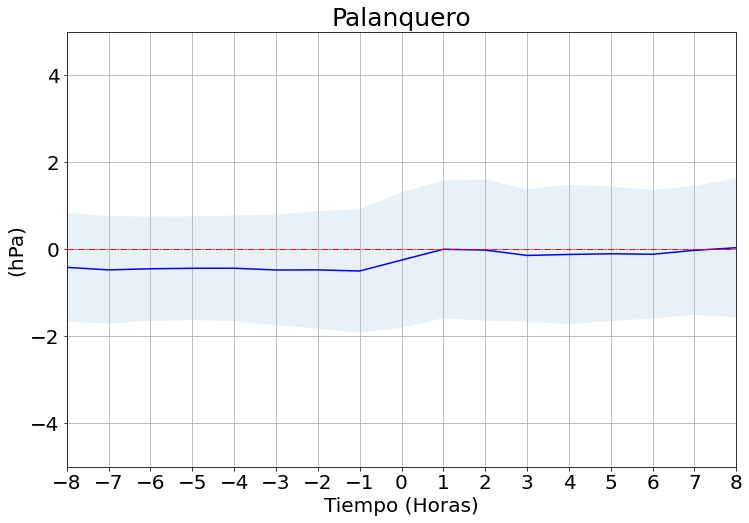

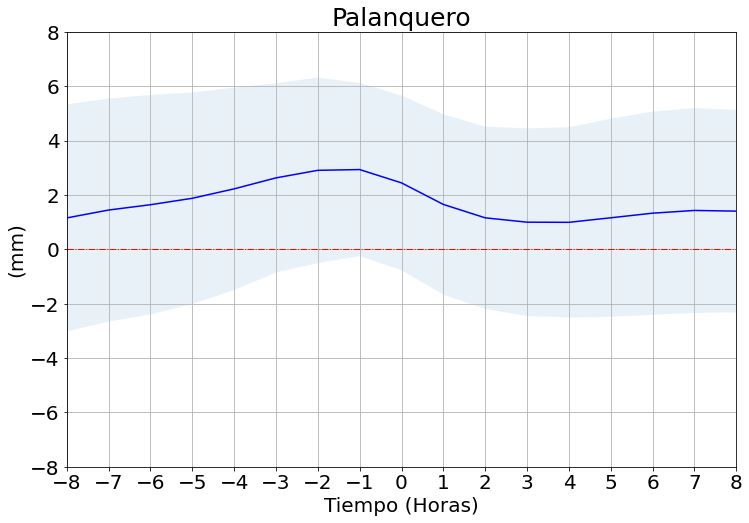

In [14]:
def plot_anomalias(df, anomalia, titulo, name_to_save, ylabel_name, int_horas, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  plt.xticks(df['FECHA_POS'], fontsize= 20)
  plt.plot(df['FECHA_POS'], df[(anomalia, 'mean')], color = 'b')
  plt.fill_between(df['FECHA_POS'], df[(anomalia, 'mean')] + df[(anomalia, 'std')], df[(anomalia, 'mean')] - df[(anomalia, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.xlim([-int_horas, int_horas])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Tiempo (Horas)", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 25)
  #plt.yticks(np.arange(-10, 10, 1))
  plt.yticks(fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(°C)', 'ylimit': [-3, 3]},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(%)', 'ylimit': [-15, 15]},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(hPa)', 'ylimit': [-5, 5]},
              'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_20h_7h_{NOMBRE_ESTACION}_{int_horas}h_nuevo.png', 'ylabel' : '(mm)', 'ylimit': [-8, 8]}
    }

for key in dict_names:
  plot_anomalias(dfAnomalia, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas, dict_names[key]['ylimit'])

# dfAnomalia

# Análisis con los 21 Eventos que tienen todas las variábles metereológicas completas

In [ ]:
dfEventos0 = dfCross.loc[dfCross['FECHA_POS'] == 0.]
dfEventos0 = dfEventos0[['FECHA_EVENTO', 'min_t', 'index'] + columns_mean]
dfEventos0['NUMERO_VARS'] = dfEventos0[columns_mean].notnull().sum(axis=1)
dfEventos0

,FECHA_EVENTO,min_t,index,TEMP,HUM,PRESION,PWV,NUMERO_VARS
6,2011-01-15 00:00:00-05:00,206.7,0,25.5,95.0,988.2,57.262000,4
19,2011-01-27 23:00:00-05:00,224.2,1,23.7,92.0,990.2,53.538182,4
32,2011-02-03 23:00:00-05:00,195.6,2,NaN,98.0,989.0,53.340909,3
45,2011-02-10 22:00:00-05:00,212.6,3,26.1,86.0,989.6,57.290000,4
58,2011-03-23 00:00:00-05:00,215.6,4,23.3,96.0,990.8,59.540000,4
...,...,...,...,...,...,...,...,...
1930,2017-11-10 23:00:00-05:00,208.2,148,25.3,NaN,987.7,61.267273,3
1943,2017-11-11 00:00:00-05:00,202.6,149,25.5,NaN,988.1,60.682727,3
1956,2017-11-14 01:00:00-05:00,196.1,150,25.6,NaN,986.5,60.924545,3
1969,2017-12-02 22:00:00-05:00,217.7,151,25.0,97.0,988.7,58.989091,4


In [ ]:
dfEventos0.count()

FECHA_EVENTO    153
min_t           153
index           153
TEMP            108
HUM              80
PRESION         109
PWV             103
NUMERO_VARS     153
dtype: int64

In [ ]:
dfEventos0['NUMERO_VARS'].value_counts()

4    71
0    42
3    38
1     2
Name: NUMERO_VARS, dtype: int64

In [ ]:
dfVarsCompletas = dfEventos0.loc[dfEventos0['NUMERO_VARS'] == 4]
indexVarsCompletas = dfVarsCompletas['index']
dfVarsComp = pd.merge(dfCross, indexVarsCompletas, on = 'index', how = 'inner')

dfAnomaliaVarsComp = dfVarsComp[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()
dfAnomaliaVarsComp

FECHA_POS TEMP_anomalia           HUM_anomalia            PRESION_anomalia  \
                      mean       std         mean        std             mean   
0       -6.0      0.254263  1.385540    -1.093201  18.041944        -0.400548   
1       -5.0      0.207113  1.516932     1.587871  10.379760        -0.375973   
2       -4.0      0.361452  1.268641     1.180425   9.001985        -0.401162   
3       -3.0      0.411702  1.090571     1.499207   7.849074        -0.418234   
4       -2.0      0.608054  1.016457     0.999711   7.637755        -0.331446   
5       -1.0      0.638847  1.025153    -0.473636   6.384318        -0.363323   
6        0.0      0.284554  1.235788    -2.040656  12.132089        -0.122091   
7        1.0     -0.241727  1.387550     0.267556   6.701051         0.152972   
8        2.0     -0.400336  1.298918    -2.442492  16.247629         0.172951   
9        3.0     -0.499854  1.256247     0.331791   7.610208         0.030708   
10       4.0     -0.634642  1.074933     0.305141  12.171238         0.035363   
11       5.0     -0.564998  1.174487     1.564353   7.876706         0.033931   
12       6.0     -0.528071  1.246167     1.453658   7.587678        -0.041688   

             PWV_anomalia            
         std         mean       std  
0   1.269421     1.554833  4.222391  
1   1.276933     1.805644  4.032034  
2   1.284169     2.236221  3.818592  
3   1.292587     2.598441  3.508646  
4   1.368493     2.942792  3.406170  
5   1.398111     2.975855  3.272117  
6   1.521519     2.553388  3.413094  
7   1.558994     1.635867  3.496157  
8   1.659365     0.977808  3.399866  
9   1.514497     0.766753  3.481258  
10  1.638457     0.650387  3.473284  
11  1.584056     0.635955  3.474414  
12  1.479432     0.735037  3.451764

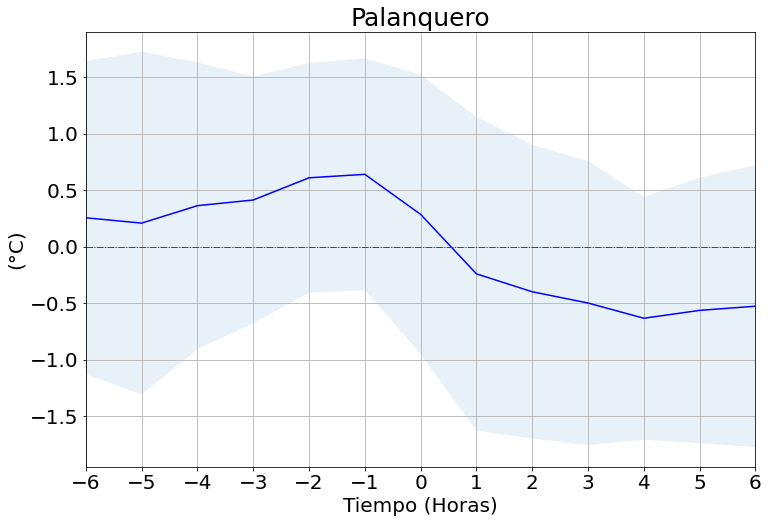

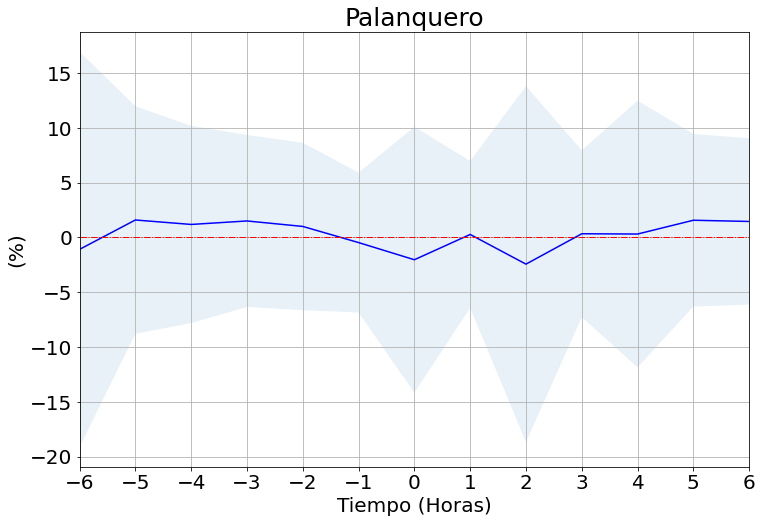

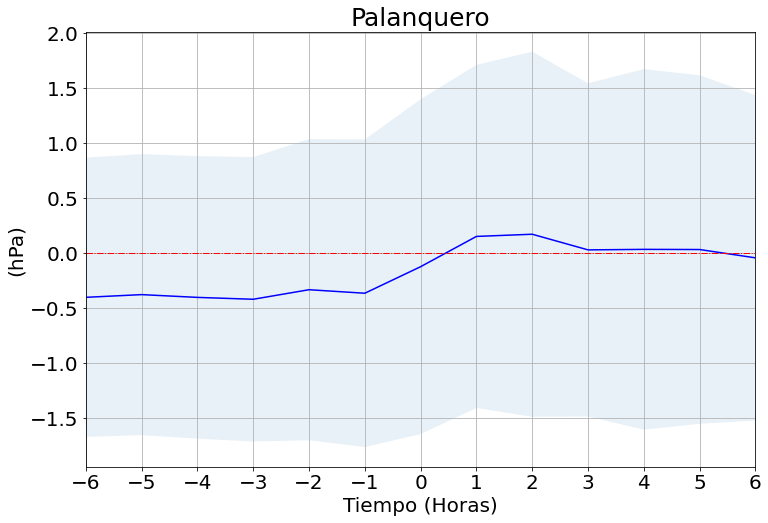

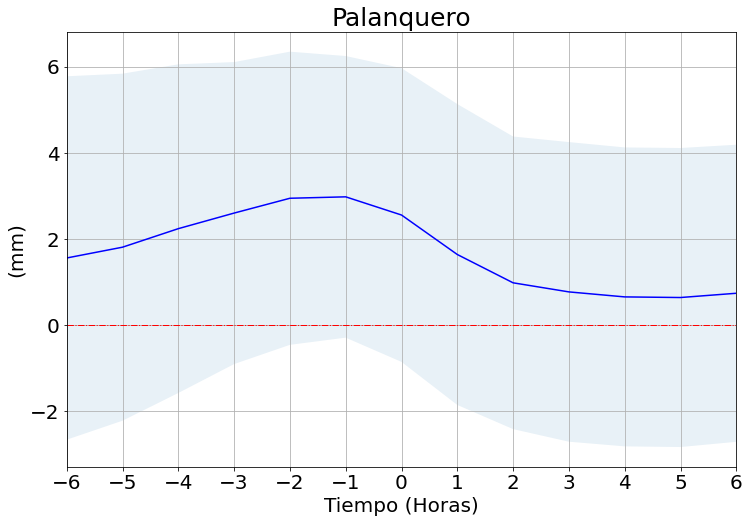

In [ ]:
dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(°C)'},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(%)'},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(hPa)'},
              'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(mm)'}
    }

for key in dict_names:
  plot_anomalias(dfAnomaliaVarsComp, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas)

# Análisis para Dirección del Viento 

In [ ]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[x], df[y])) if np.arctan2(df[x], df[y]) > 0 else 360 + np.rad2deg(np.arctan2(df[x], df[y]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

# df10mean['DIRVIENTO_mean'] = df10mean.apply(func_dir, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
# df10mean['VELVIENTO_mean'] = df10mean.apply(func_vel, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
df10m['DIRVIENTO'] = df10m.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
df10m['VELVIENTO'] = df10m.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

In [ ]:
df10m

,FECHA_HORA,X_VIENTO,Y_VIENTO,HORA,FECHA,DIRVIENTO,VELVIENTO
0,2011-01-02 00,-0.020676,-0.144283,00,2011-01-02 00:00:00-05:00,188.154988,0.145757
1,2011-01-02 01,-0.010329,-0.114271,01,2011-01-02 01:00:00-05:00,185.165060,0.114737
2,2011-01-02 02,-0.004356,-0.133153,02,2011-01-02 02:00:00-05:00,181.873571,0.133225
3,2011-01-02 03,-0.013790,-0.164974,03,2011-01-02 03:00:00-05:00,184.778293,0.165550
4,2011-01-02 04,-0.002036,-0.116649,04,2011-01-02 04:00:00-05:00,181.000000,0.116667
...,...,...,...,...,...,...,...
41343,2017-12-31 17,0.627704,-1.636584,17,2017-12-31 17:00:00-05:00,159.015918,1.752832
41344,2017-12-31 19,-0.112232,0.016378,19,2017-12-31 19:00:00-05:00,278.302416,0.113421
41345,2017-12-31 20,-0.102170,0.407207,20,2017-12-31 20:00:00-05:00,345.914990,0.419829
41346,2017-12-31 21,0.194049,-0.179630,21,2017-12-31 21:00:00-05:00,132.790163,0.264428


# Cargando Eventos e encontrando intervalo m minutos antes y después

## Para 10 minutos

In [ ]:
funtimeMinutes = lambda x, minute : [x + timedelta(minutes = h) for h in (range(0, minute+1, 10) if minute > 0 else range(minute, 0, 10))]

dfEventAnMin = dfEventos.copy()

dfEventAnMin['FECHA_ANTES_MIN'] = dfEventAnMin['FECHA_MIN'].apply(funtimeMinutes, minute = -int_minutes)
dfEventAnMin['FECHA_DESPUES_MIN'] = dfEventAnMin['FECHA_MIN'].apply(funtimeMinutes, minute = int_minutes)

dfEventAnMin['FECHA_INTERVALO'] = dfEventAnMin['FECHA_ANTES_MIN'] + dfEventAnMin['FECHA_DESPUES_MIN']
dfEventAnMin = dfEventAnMin.drop(columns=['FECHA_ANTES_MIN', 'FECHA_DESPUES_MIN']).explode('FECHA_INTERVALO')
dfEventAnMin['FECHA_POS'] = (dfEventAnMin['FECHA_INTERVALO'] - dfEventAnMin['FECHA_MIN'])/ pd.Timedelta(minutes=1)
dfEventAnMin = dfEventAnMin.rename(columns={'FECHA_MIN' : 'FECHA_EVENTO', 'FECHA': 'FECHA_HORA', 'FECHA_INTERVALO': 'FECHA'}).reset_index(drop=True)
dfEventAnMin['FECHA'] = dfEventAnMin['FECHA'].astype(str)

dfEventAnMin.head(10)

,FECHA_HORA,FECHA_EVENTO,min_t,lon_t,lat_t,FECHA,FECHA_POS
0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 16:20:00-05:00,-480.0
1,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 16:30:00-05:00,-470.0
2,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 16:40:00-05:00,-460.0
3,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 16:50:00-05:00,-450.0
4,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 17:00:00-05:00,-440.0
5,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 17:10:00-05:00,-430.0
6,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 17:20:00-05:00,-420.0
7,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 17:30:00-05:00,-410.0
8,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 17:40:00-05:00,-400.0
9,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 17:50:00-05:00,-390.0


In [ ]:
dfCrossPrec = pd.merge(dfEventAnMin, dfPrec, on='FECHA', how = 'left')

dfCrossPrecGroup = dfCrossPrec.groupby("FECHA_POS").agg({"PREC" : ["mean", "std"]})
dfCrossPrecGroup = dfCrossPrecGroup.rename(columns = {("PREC", "mean") : "PREC_mean", ("PREC", "std") : "PREC_std"}).reset_index()

dfCrossPrecGroup

FECHA_POS      PREC          
                  mean       std
0     -480.0  0.000847  0.009206
1     -470.0  0.003448  0.018326
2     -460.0  0.001724  0.013073
3     -450.0  0.002586  0.015941
4     -440.0  0.000870  0.009325
..       ...       ...       ...
92     440.0  0.017094  0.096749
93     450.0  0.020000  0.096667
94     460.0  0.046667  0.345422
95     470.0  0.065289  0.515705
96     480.0  0.019835  0.090018

[97 rows x 3 columns]

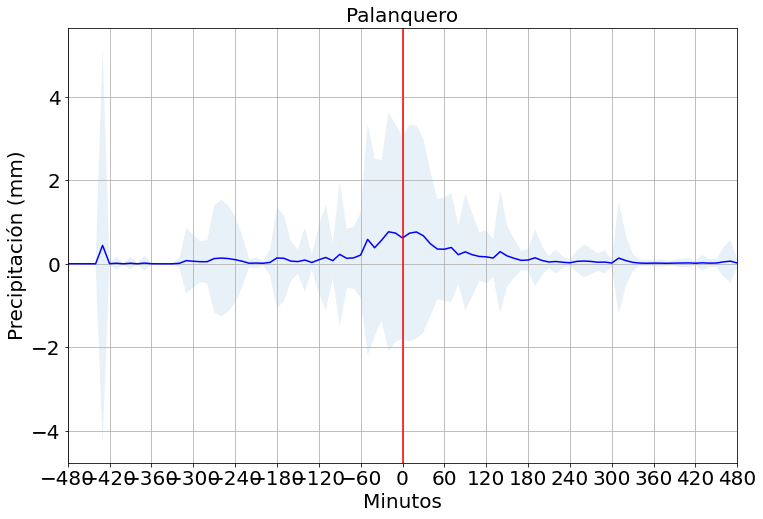

In [ ]:
def plot_10m_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[(campo, 'mean')], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[(campo, 'mean')] + df[(campo, 'std')], df[(campo, 'mean')] - df[(campo, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  # plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'PREC' : {'title' : 'Análisis de Precipitación de eventos convectivos', 'name2save' : f'analisis_prec_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Precipitación (mm)'},

    }

for key in dict_names.keys():
  plot_10m_interval(dfCrossPrecGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)


## Para 5 minutos

In [25]:
funtimeMinutes = lambda x, minute : [x + timedelta(minutes = h) for h in (range(0, minute+1, intervalo_minutes_samples_5m) if minute > 0 else range(minute, 0, intervalo_minutes_samples_5m))]

dfEventAn5Min = dfEventos.copy()

dfEventAn5Min['FECHA_ANTES_MIN'] = dfEventAn5Min['FECHA_MIN'].apply(funtimeMinutes, minute = -int_minutes)
dfEventAn5Min['FECHA_DESPUES_MIN'] = dfEventAn5Min['FECHA_MIN'].apply(funtimeMinutes, minute = int_minutes)

dfEventAn5Min['FECHA_INTERVALO'] = dfEventAn5Min['FECHA_ANTES_MIN'] + dfEventAn5Min['FECHA_DESPUES_MIN']
dfEventAn5Min = dfEventAn5Min.drop(columns=['FECHA_ANTES_MIN', 'FECHA_DESPUES_MIN']).explode('FECHA_INTERVALO')
dfEventAn5Min['FECHA_POS'] = (dfEventAn5Min['FECHA_INTERVALO'] - dfEventAn5Min['FECHA_MIN'])/ pd.Timedelta(minutes=1)
dfEventAn5Min = dfEventAn5Min.rename(columns={'FECHA_MIN' : 'FECHA_EVENTO', 'FECHA': 'FECHA_HORA', 'FECHA_INTERVALO': 'FECHA'}).reset_index(drop=True)
dfEventAn5Min['FECHA'] = dfEventAn5Min['FECHA'].astype(str)

dfEventAn5Min.head(10)

,FECHA_HORA,FECHA_EVENTO,min_t,lon_t,lat_t,FECHA,FECHA_POS
0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:20:00-05:00,-720.0
1,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:25:00-05:00,-715.0
2,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:30:00-05:00,-710.0
3,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:35:00-05:00,-705.0
4,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:40:00-05:00,-700.0
5,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:45:00-05:00,-695.0
6,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:50:00-05:00,-690.0
7,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 12:55:00-05:00,-685.0
8,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 13:00:00-05:00,-680.0
9,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 13:05:00-05:00,-675.0


In [26]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean'] 

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [27]:
### Calculando Dataframe con la media de todos los datos de PWV

dfPWV_5m['HORA'] = dfPWV_5m['FECHA'].apply(lambda x: x[11:16])
dfmean_PWV_5m = dfPWV_5m.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean_PWV_5m.columns if col != 'HORA']
for col in columns_mean:
  dfmean_PWV_5m = dfmean_PWV_5m.rename(columns={col : f'{col}_mean'})

### Cruzamos los datos con los horarios de los eventos y lo separamos

dfCrossPWV_5m = pd.merge(dfEventAn5Min, dfPWV_5m, on='FECHA', how = 'left')
dfCrossPWV_5m['HORA'] = dfCrossPWV_5m['FECHA'].apply(lambda x: x[11:16])

### Cruzamos con los datos de la media
dfCrossPWV_5m = pd.merge(dfCrossPWV_5m, dfmean_PWV_5m, on = 'HORA', how='left')

### Calculamos la anomalia haciendo (dato - media)
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  dfCrossPWV_5m[anomalia] = dfCrossPWV_5m[f'{col}'] - dfCrossPWV_5m[f'{col}_mean'] 

### Calculo de las medias de los eventos
dfCrossPWV_5mGroup = dfCrossPWV_5m.groupby("FECHA_POS").agg({"PWV" : ["mean", "std"]})
dfCrossPWV_5mGroup = dfCrossPWV_5mGroup.rename(columns = {("PWV", "mean") : "PWV_mean", ("PWV", "std") : "PWV_std"}).reset_index()

### Agrupamiento para anomalias
dfCrossPWV_5mGroup_anom = dfCrossPWV_5m.groupby("FECHA_POS").agg({"PWV_anomalia" : ["mean", "std"]})
dfCrossPWV_5mGroup_anom = dfCrossPWV_5mGroup_anom.rename(columns = {("PWV_anomalia", "mean") : "PWV_anomalia_mean", ("PWV_anomalia", "std") : "PWV_anomalia_std"}).reset_index()


# dfCrossPWV_5mGroup

## Gráfica de PWV 5 minutos

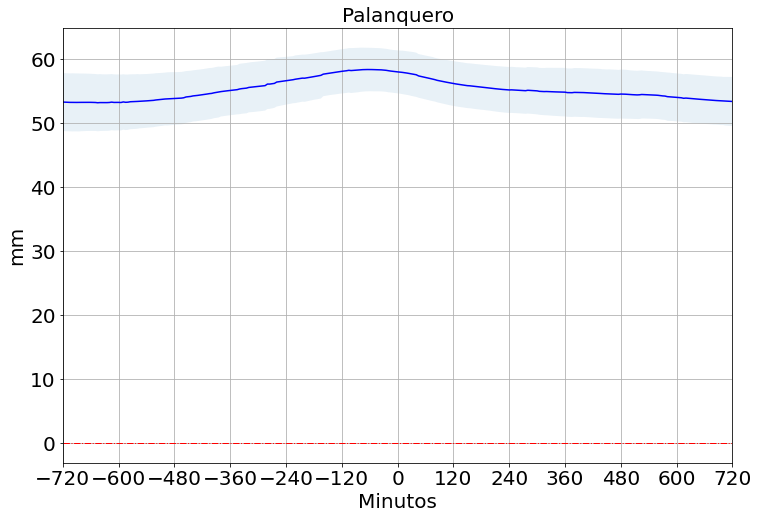

In [28]:
def plot_5m_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 24
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[(campo, 'mean')], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[(campo, 'mean')] + df[(campo, 'std')], df[(campo, 'mean')] - df[(campo, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  #plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'PWV' : {'title' : 'Palanquero', 'name2save' : f'analisis_pwv_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_5min_nuevo.png', 'ylabel' : 'mm'},

    }

for key in dict_names.keys():
  plot_5m_interval(dfCrossPWV_5mGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)

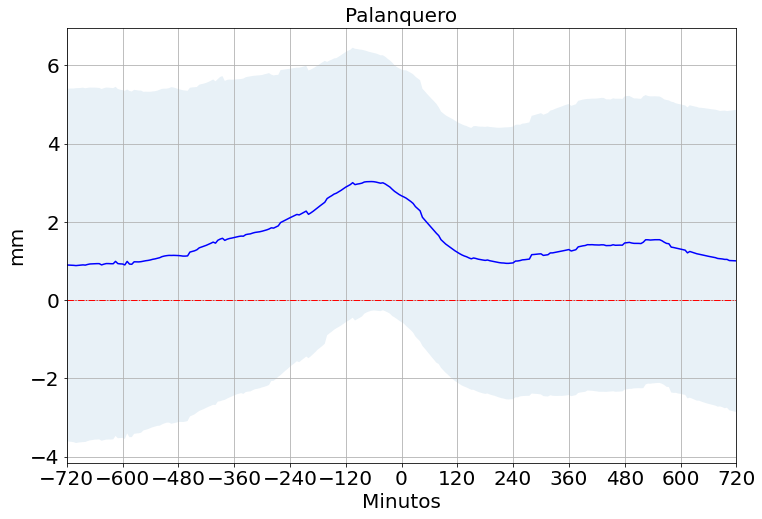

In [29]:
dict_names = {'PWV_anomalia' : {'title' : 'Palanquero', 'name2save' : f'analisis_pwv_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_5min_anomalia_nuevo.png', 'ylabel' : 'mm'},

    }

for key in dict_names.keys():
  plot_5m_interval(dfCrossPWV_5mGroup_anom, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)

## Análisis de percentiles - Precipitación

In [ ]:
def plot_percentil_interval_prec(df, campos, campo_analizar, titulo, name_to_save, ylabel_name, int_minutes, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0

  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency],fontsize=20)
  plt.yticks(fontsize=20)
  if not .5 in campos:
    campos.append(.5)
  #for campo in campos:
    #plt.plot(df['FECHA_POS'], df[campo], label = f"Percentil {campo}")
  #plt.plot(df['FECHA_POS'], df[.5], label = f"Percentil")
  ## Gráfica del promedio 
  plt.plot(df['FECHA_POS'], df[(campo_analizar, 'mean')], linestyle = '--')

  ## Gráfica de la desviación standard
  plt.fill_between(df['FECHA_POS'], df[campos[0]] , df[campos[1]], alpha=.1, linestyle = '--', linewidth = 0.5)
  
  plt.axvline(color = 'r')
  plt.grid()
  plt.xlim([-int_minutes, int_minutes])
  plt.ylim(0,1.2)
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos",fontsize=20)
  plt.ylabel(ylabel_name,fontsize=20)
  plt.title("Palanquero",fontsize=20)
  plt.legend(fontsize=20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9138: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  sort=sort,


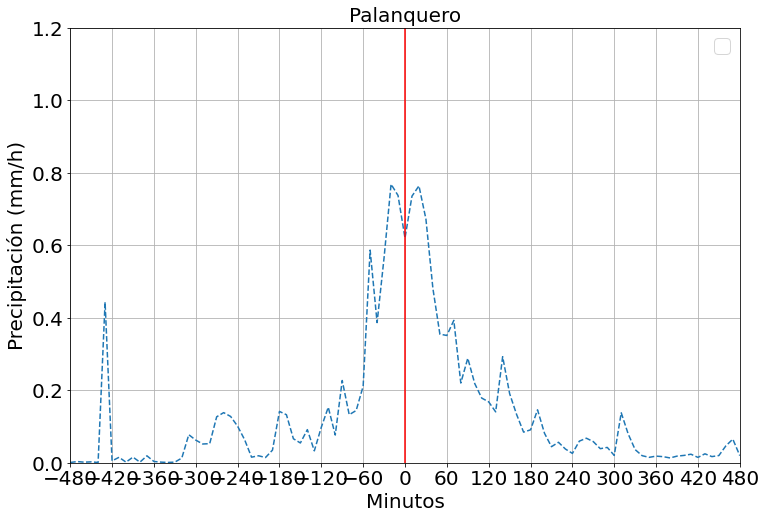

In [ ]:
list_percentil = [ 0.05, .1, .20, .25, .50, .75, .80, .90, 0.95]
dfCrossPrecNotNan = dfCrossPrec.dropna().reset_index()
dfPercentilPrec= dfCrossPrecNotNan.groupby("FECHA_POS")['PREC'].quantile(list_percentil).reset_index()
dfAggPrec = dfCrossPrecNotNan.groupby("FECHA_POS").agg({"PREC" : ["mean", "std"]})

dfPercentilPrec = dfPercentilPrec.pivot(index='FECHA_POS', columns='level_1')['PREC'].reset_index()
dfPercentilPrec = dfPercentilPrec.join(dfAggPrec, "FECHA_POS")

dict_names = {'title' : 'Análisis de precipitación', 
              'name2save' : f'analisis_precipitacion_percentil_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 
              'ylabel' : 'Precipitación (mm/h)'
              }

plot_percentil_interval_prec(dfPercentilPrec, [.10, .10], 'PREC', dict_names['title'], dict_names['name2save'], dict_names['ylabel'], int_minutes)

In [ ]:
dfCrossPrecNotNan[dfCrossPrecNotNan['FECHA_POS'] == 0]

,index,FECHA_HORA,FECHA_EVENTO,min_t,lon_t,lat_t,FECHA,FECHA_POS,PREC
36,36,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-15 00:20:00-05:00,0.0,0.0
109,109,2011-01-27 23:00:00-05:00,2011-01-27 23:20:00-05:00,224.2,-74.693,5.627,2011-01-27 23:20:00-05:00,0.0,0.0
182,182,2011-02-03 23:00:00-05:00,2011-02-03 23:20:00-05:00,195.6,-74.836,5.627,2011-02-03 23:20:00-05:00,0.0,1.9
255,255,2011-02-10 22:00:00-05:00,2011-02-10 21:40:00-05:00,212.6,-74.836,5.627,2011-02-10 21:40:00-05:00,0.0,0.0
328,328,2011-03-23 00:00:00-05:00,2011-03-22 23:40:00-05:00,215.6,-74.836,5.341,2011-03-22 23:40:00-05:00,0.0,0.5
...,...,...,...,...,...,...,...,...,...
7594,10840,2017-11-10 23:00:00-05:00,2017-11-10 23:20:00-05:00,208.2,-74.693,5.484,2017-11-10 23:20:00-05:00,0.0,0.0
7667,10913,2017-11-11 00:00:00-05:00,2017-11-10 23:40:00-05:00,202.6,-74.836,5.341,2017-11-10 23:40:00-05:00,0.0,0.0
7740,10986,2017-11-14 01:00:00-05:00,2017-11-14 00:40:00-05:00,196.1,-74.693,5.627,2017-11-14 00:40:00-05:00,0.0,0.0
7813,11059,2017-12-02 22:00:00-05:00,2017-12-02 21:40:00-05:00,217.7,-74.836,5.484,2017-12-02 21:40:00-05:00,0.0,0.0


# Análisis de Viento

In [ ]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[x], df[y])) if np.arctan2(df[x], df[y]) > 0 else 360 + np.rad2deg(np.arctan2(df[x], df[y]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

In [ ]:
dfEventAnMin['HORA_MINUTO'] = dfEventAnMin['FECHA'].apply(lambda x: x[11:16])
dfEventAnMin

,FECHA_HORA,FECHA_EVENTO,min_t,lon_t,lat_t,FECHA,FECHA_POS,HORA_MINUTO
0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 18:20:00-05:00,-360.0,18:20
1,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 18:30:00-05:00,-350.0,18:30
2,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 18:40:00-05:00,-340.0,18:40
3,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 18:50:00-05:00,-330.0,18:50
4,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 19:00:00-05:00,-320.0,19:00
...,...,...,...,...,...,...,...,...
11164,2017-12-29 00:00:00-05:00,2017-12-28 23:40:00-05:00,202.5,-74.836,5.484,2017-12-29 05:00:00-05:00,320.0,05:00
11165,2017-12-29 00:00:00-05:00,2017-12-28 23:40:00-05:00,202.5,-74.836,5.484,2017-12-29 05:10:00-05:00,330.0,05:10
11166,2017-12-29 00:00:00-05:00,2017-12-28 23:40:00-05:00,202.5,-74.836,5.484,2017-12-29 05:20:00-05:00,340.0,05:20
11167,2017-12-29 00:00:00-05:00,2017-12-28 23:40:00-05:00,202.5,-74.836,5.484,2017-12-29 05:30:00-05:00,350.0,05:30


In [ ]:
dfViento['HORA_MINUTO'] = dfViento['FECHA'].apply(lambda x: x[11:16])
dfViento

dfVientoMean = dfViento.groupby('HORA_MINUTO').agg('mean').reset_index(level=0)
dfVientoMean = dfVientoMean.rename(columns={"VELVIENTO":"VELVIENTO_mean"})

In [ ]:
dfCrossVientos = pd.merge(dfEventAnMin[['HORA_MINUTO', 'FECHA_POS', 'FECHA']], dfViento[[col for col in dfViento.columns if col != "HORA_MINUTO" ]], on='FECHA', how = 'left')
dfCrossVientos = pd.merge(dfCrossVientos, dfVientoMean[['HORA_MINUTO', 'VELVIENTO_mean']], on='HORA_MINUTO', how = 'left')

### Cálculo de la anomalia
dfCrossVientos['VEL_VIENTO_anomalia'] = dfCrossVientos['VELVIENTO'] - dfCrossVientos['VELVIENTO_mean']

dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : ["mean", "std"]}).reset_index()
# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : "mean", "VEL_VIENTO_anomalia" : "std"}).reset_index()
# dfCrossVientosGroup
# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VELVIENTO" : ["mean", "std"]}).reset_index()

dfCrossVientosGroup2 = pd.DataFrame()
dfCrossVientosGroup2['FECHA_POS'] = dfCrossVientosGroup[('FECHA_POS',     '')]
dfCrossVientosGroup2['VEL_VIENTO_STD'] = dfCrossVientosGroup[("VEL_VIENTO_anomalia", "std") ]
dfCrossVientosGroup2['VEL_VIENTO_MEAN'] = dfCrossVientosGroup[("VEL_VIENTO_anomalia", "mean") ]

In [ ]:
# dfCrossVientos = pd.merge(dfEventAnMin, dfViento, on='FECHA', how = 'left')
# dfCrossVientos = dfCrossVientos.loc[dfCrossVientos['FECHA_POS'] == 240]
# dfCrossVientos["X_VIENTO_STD"] = dfCrossVientos["X_VIENTO"]
# dfCrossVientos["Y_VIENTO_STD"] = dfCrossVientos["Y_VIENTO"]


# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VELVIENTO" : ["mean", "std"]}).reset_index()
# dfCrossVientosGroup = dfCrossVientosGroup.rename(columns = {("VELVIENTO", "mean") : "VEL_VIENTO_mean", ("VELVIENTO", "std") : "VEL_VIENTO_std", ('FECHA_POS',     '') : "FECHA_POS"})
# dfCrossVientosGroup2 = pd.DataFrame()
# dfCrossVientosGroup2['FECHA_POS'] = dfCrossVientosGroup[('FECHA_POS',     '')]
# dfCrossVientosGroup2['VEL_VIENTO_STD'] = dfCrossVientosGroup[("VELVIENTO", "std") ]
# dfCrossVientosGroup2['VEL_VIENTO_MEAN'] = dfCrossVientosGroup[("VELVIENTO", "mean") ]

# dfCrossVientosGroup.rename(columns = {("VELVIENTO", "mean") : "VEL_VIENTO_mean", ("VELVIENTO", "std") : "VEL_VIENTO_std", ('FECHA_POS',     '') : "FECHA_POS"})

# dfCrossVientosGroup['DIR_VIENTO'] = dfCrossVientosGroup.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['DIR_VIENTO'] = (dfCrossVientosGroup['DIR_VIENTO'] + 180.0) % 360
# dfCrossVientosGroup['VEL_VIENTO'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['VEL_VIENTO_MEAN'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['VEL_VIENTO_STD'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO_STD', y='Y_VIENTO_STD', axis=1)

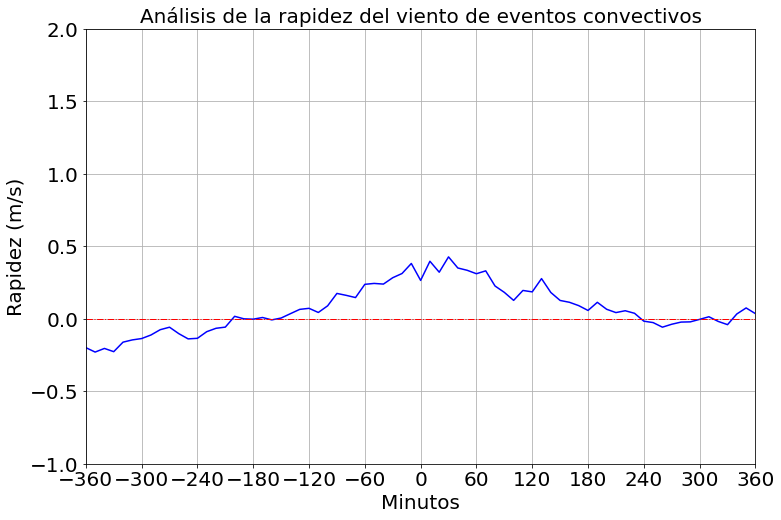

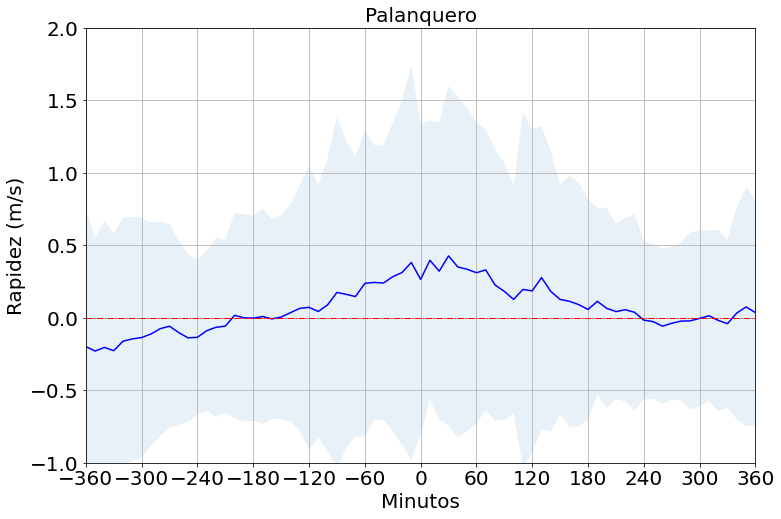

In [ ]:
def plot_10m_interval_v2(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[f"{campo}_MEAN"] + df[f"{campo}_STD"], df[f"{campo}_MEAN"] - df[f"{campo}_STD"], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  # plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title(titulo, fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

def plot_dir_viento_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(range(0, 361, 45), fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[f"{campo}_MEAN"] + df[f"{campo}_STD"], df[f"{campo}_MEAN"] - df[f"{campo}_STD"], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  plt.grid()
  plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'DIR_VIENTO' : {'title' : 'Análisis de la dirección del viento de eventos convectivos', 'name2save' : f'analisis_dir_viento_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Dirección (°)'},
              'VEL_VIENTO' : {'title' : 'Análisis de la rapidez del viento de eventos convectivos', 'name2save' : f'analisis_vel_viento_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Rapidez (m/s)'},
              'VEL_VIENTO_2' : {'title' : 'Palanquero', 'name2save' : f'analisis_vel_viento_std_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Rapidez (m/s)'},
             }

# key = 'DIR_VIENTO'
# plot_dir_viento_interval(dfCrossVientosGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit = [0, 360], has_std=False)

key = 'VEL_VIENTO'
plot_10m_interval_v2(dfCrossVientosGroup2, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit=[-1, 2], has_std=False)

key = 'VEL_VIENTO_2'
plot_10m_interval_v2(dfCrossVientosGroup2, 'VEL_VIENTO', dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit=[-1, 2], has_std=True)

## Anáisis de Percentiles

In [ ]:
dfCrossVientos

,HORA_MINUTO,FECHA_POS,FECHA,DIRECVIENTO,VELVIENTO,FECHA_HORA,X_VIENTO,Y_VIENTO,VELVIENTO_mean,VEL_VIENTO_anomalia
0,18:20,-360.0,2011-01-14 18:20:00-05:00,1.0,0.1,2011-01-14 18,-0.001745,-0.099985,0.756852,-0.656852
1,18:30,-350.0,2011-01-14 18:30:00-05:00,1.0,0.1,2011-01-14 18,-0.001745,-0.099985,0.718218,-0.618218
2,18:40,-340.0,2011-01-14 18:40:00-05:00,1.0,0.1,2011-01-14 18,-0.001745,-0.099985,0.687803,-0.587803
3,18:50,-330.0,2011-01-14 18:50:00-05:00,1.0,0.1,2011-01-14 18,-0.001745,-0.099985,0.854671,-0.754671
4,19:00,-320.0,2011-01-14 19:00:00-05:00,1.0,0.2,2011-01-14 19,-0.003490,-0.199970,0.641404,-0.441404
...,...,...,...,...,...,...,...,...,...,...
11164,05:00,320.0,2017-12-29 05:00:00-05:00,297.0,0.8,2017-12-29 05,0.712805,-0.363192,0.510006,0.289994
11165,05:10,330.0,2017-12-29 05:10:00-05:00,330.0,1.1,2017-12-29 05,0.550000,-0.952628,0.495547,0.604453
11166,05:20,340.0,2017-12-29 05:20:00-05:00,6.0,1.3,2017-12-29 05,-0.135887,-1.292878,0.499568,0.800432
11167,05:30,350.0,2017-12-29 05:30:00-05:00,355.0,1.4,2017-12-29 05,0.122018,-1.394673,0.501790,0.898210


In [ ]:
def plot_percentil_interval(df, campos, campo_analizar, titulo, name_to_save, ylabel_name, int_minutes, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0

  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if not .5 in campos:
    campos.append(.5)
  #for campo in campos:
    #plt.plot(df['FECHA_POS'], df[campo], label = f"Percentil {campo}")
  # plt.plot(df['FECHA_POS'], df[0.5], label = f"Percentil {0.5}")
  ## Gráfica del promedio 
  plt.plot(df['FECHA_POS'], df[(campo_analizar, 'mean')], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)

  ## Gráfica de la desviación standard
  plt.fill_between(df['FECHA_POS'], df[campos[0]] , df[campos[1]], alpha=.1, linestyle = '--', linewidth = 0.5)
  
  # plt.axvline(color = 'r')
  plt.grid()
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)
  plt.legend()

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )


In [ ]:
dfCrossVientos

,HORA_MINUTO,FECHA_POS,FECHA,DIRECVIENTO,VELVIENTO,FECHA_HORA,X_VIENTO,Y_VIENTO,VELVIENTO_mean,VEL_VIENTO_anomalia
0,18:20,-360.0,2011-01-14 18:20:00-05:00,1.0,0.1,2011-01-14 18,-0.001745,-0.099985,0.756852,-0.656852
1,18:30,-350.0,2011-01-14 18:30:00-05:00,1.0,0.1,2011-01-14 18,-0.001745,-0.099985,0.718218,-0.618218
2,18:40,-340.0,2011-01-14 18:40:00-05:00,1.0,0.1,2011-01-14 18,-0.001745,-0.099985,0.687803,-0.587803
3,18:50,-330.0,2011-01-14 18:50:00-05:00,1.0,0.1,2011-01-14 18,-0.001745,-0.099985,0.854671,-0.754671
4,19:00,-320.0,2011-01-14 19:00:00-05:00,1.0,0.2,2011-01-14 19,-0.003490,-0.199970,0.641404,-0.441404
...,...,...,...,...,...,...,...,...,...,...
11164,05:00,320.0,2017-12-29 05:00:00-05:00,297.0,0.8,2017-12-29 05,0.712805,-0.363192,0.510006,0.289994
11165,05:10,330.0,2017-12-29 05:10:00-05:00,330.0,1.1,2017-12-29 05,0.550000,-0.952628,0.495547,0.604453
11166,05:20,340.0,2017-12-29 05:20:00-05:00,6.0,1.3,2017-12-29 05,-0.135887,-1.292878,0.499568,0.800432
11167,05:30,350.0,2017-12-29 05:30:00-05:00,355.0,1.4,2017-12-29 05,0.122018,-1.394673,0.501790,0.898210


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9138: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  sort=sort,


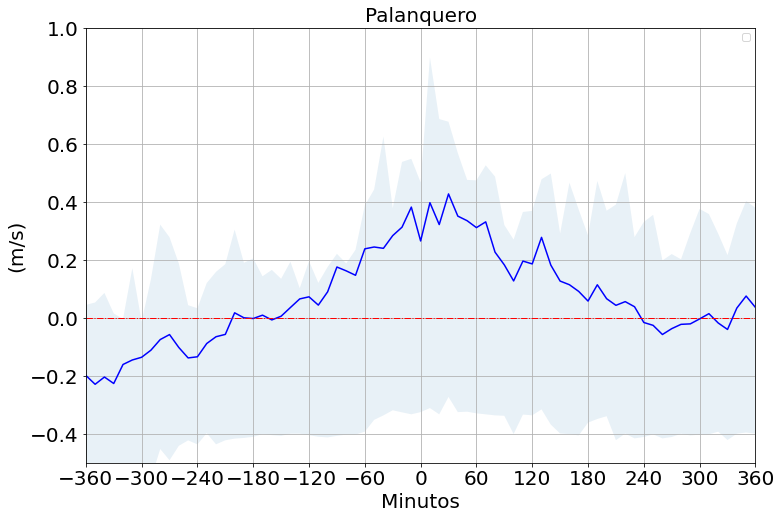

In [ ]:
list_percentil = [.10, .20,.25, .50, .75, .80, .90]
dfPercentilViento = dfCrossVientos.groupby("FECHA_POS")['VEL_VIENTO_anomalia'].quantile(list_percentil).reset_index()
dfAggViento = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : ["mean", "std"]})

dfPercentilViento = dfPercentilViento.pivot(index='FECHA_POS', columns='level_1')['VEL_VIENTO_anomalia'].reset_index()
dfPercentilViento = dfPercentilViento.join(dfAggViento, "FECHA_POS")

dict_names = {'title' : 'Análisis de rapidez del viento', 
              'name2save' : f'analisis_rapidez_viento_percentil_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_anomalia_mean.png', 
              'ylabel' : '(m/s)'
              }

plot_percentil_interval(dfPercentilViento, [.25, .75], 'VEL_VIENTO_anomalia', dict_names['title'], dict_names['name2save'], dict_names['ylabel'], int_minutes, ylimit=[-.5, 1])

# Análisis de viento por hora

In [ ]:
dfCrossVientosHora = pd.merge(dfEventAn, df10m, on='FECHA', how = 'left')

dfCrossVientosHora
# dfCrossVientosHoraGroup = dfCrossVientosHora.groupby("FECHA_POS").agg({"X_VIENTO" : "mean", "Y_VIENTO" : "mean"}).reset_index()

dfCrossVientosHora['DIR_VIENTO'] = dfCrossVientosHora.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
dfCrossVientosHora['DIR_VIENTO'] = (dfCrossVientosHora['DIR_VIENTO'] + 180.0) % 360
dfCrossVientosHora['VEL_VIENTO'] = dfCrossVientosHora.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

dfCrossVientosHora

,index,FECHA_EVENTO,FECHA_MIN,min_t,lon_t,lat_t,FECHA,FECHA_POS,FECHA_HORA,X_VIENTO,Y_VIENTO,HORA,DIRVIENTO,VELVIENTO,DIR_VIENTO,VEL_VIENTO
0,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 18:00:00-05:00,-6.0,2011-01-14 18,-0.003490,-0.133272,18,181.499962,0.133318,1.499962,0.133318
1,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 19:00:00-05:00,-5.0,2011-01-14 19,-0.027756,-0.195051,19,188.098946,0.197016,8.098946,0.197016
2,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 20:00:00-05:00,-4.0,2011-01-14 20,-0.035483,-0.139636,20,194.257519,0.144074,14.257519,0.144074
3,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 21:00:00-05:00,-3.0,2011-01-14 21,-0.020864,-0.127290,21,189.308743,0.128988,9.308743,0.128988
4,0,2011-01-15 00:00:00-05:00,2011-01-15 00:20:00-05:00,206.7,-74.836,5.627,2011-01-14 22:00:00-05:00,-2.0,2011-01-14 22,-0.003487,-0.116560,22,181.713731,0.116612,1.713731,0.116612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,152,2017-12-29 00:00:00-05:00,2017-12-28 23:40:00-05:00,202.5,-74.836,5.484,2017-12-29 02:00:00-05:00,2.0,2017-12-29 02,-0.238541,0.473911,02,333.281778,0.530559,153.281778,0.530559
1985,152,2017-12-29 00:00:00-05:00,2017-12-28 23:40:00-05:00,202.5,-74.836,5.484,2017-12-29 03:00:00-05:00,3.0,2017-12-29 03,0.223685,-0.286973,03,142.064856,0.363853,322.064856,0.363853
1986,152,2017-12-29 00:00:00-05:00,2017-12-28 23:40:00-05:00,202.5,-74.836,5.484,2017-12-29 04:00:00-05:00,4.0,2017-12-29 04,0.315911,0.395494,04,38.617059,0.506177,218.617059,0.506177
1987,152,2017-12-29 00:00:00-05:00,2017-12-28 23:40:00-05:00,202.5,-74.836,5.484,2017-12-29 05:00:00-05:00,5.0,2017-12-29 05,0.253255,-1.002975,05,165.828832,1.034454,345.828832,1.034454


In [ ]:
def plot_windrose(df, title, path_to_save):
  ax = WindroseAxes.from_ax()

  ax.bar(df['DIR_VIENTO'], df['VEL_VIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 5, 0.5), edgecolor='white', cmap=cm.cool)
  ax.set_legend(loc = 3)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'])
  plt.title(title)
  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )
  plt.show()

In [ ]:
posHoras = set(list(dfCrossVientosHora['FECHA_POS']))
posHoras

{-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

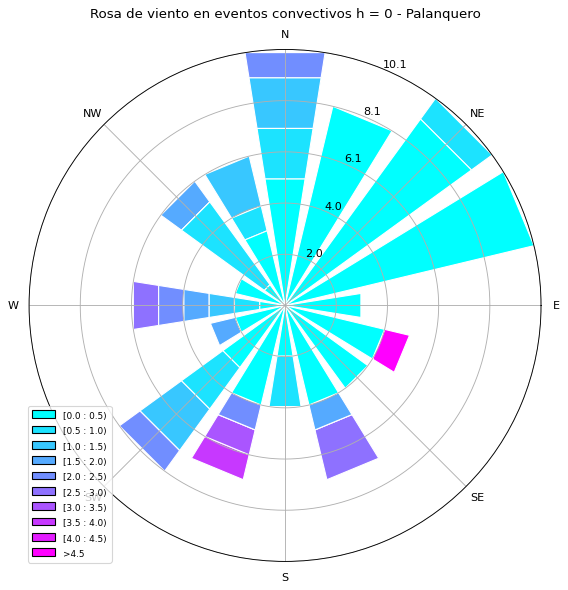

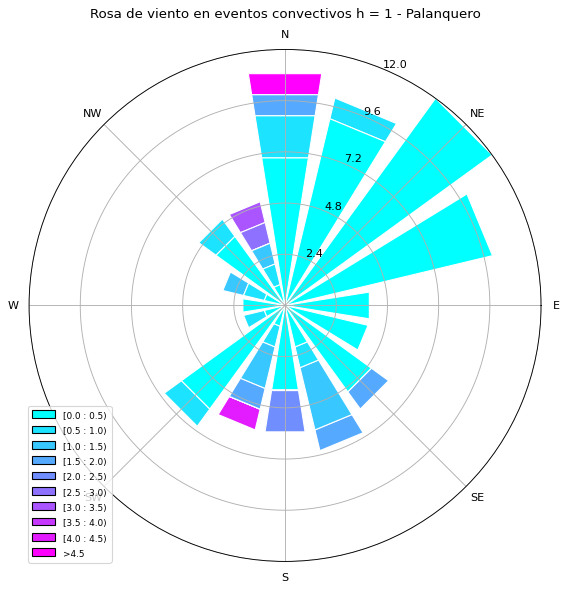

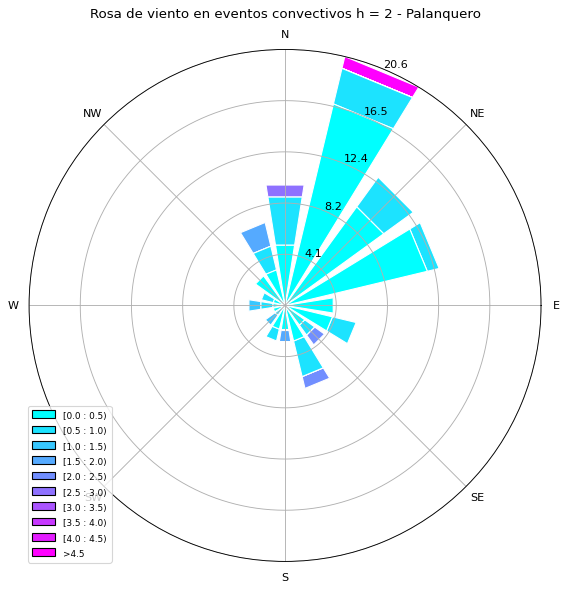

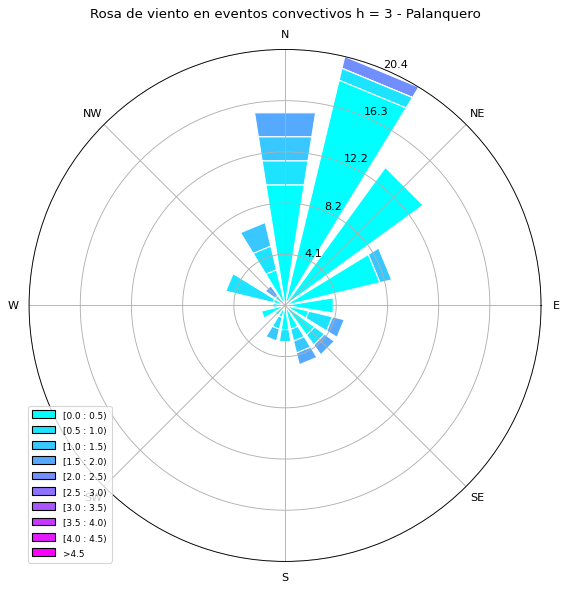

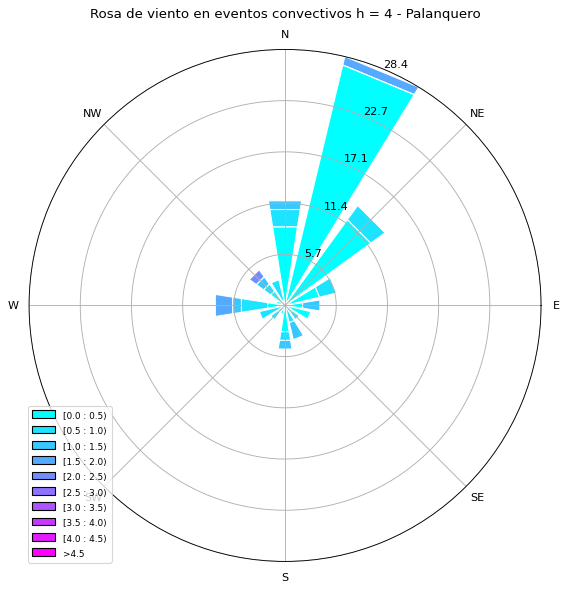

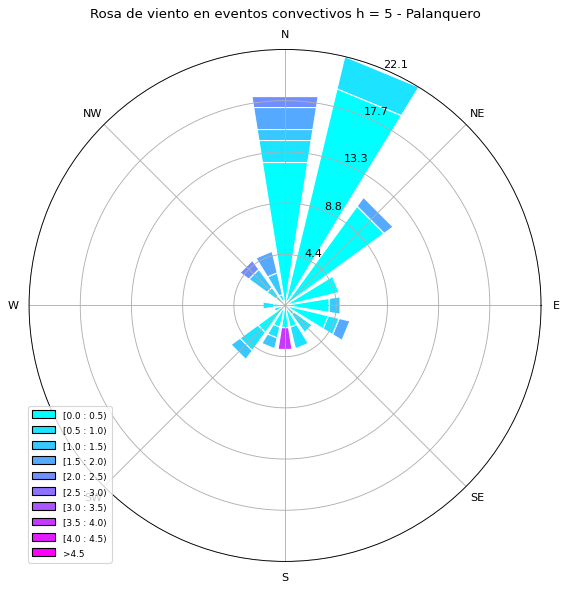

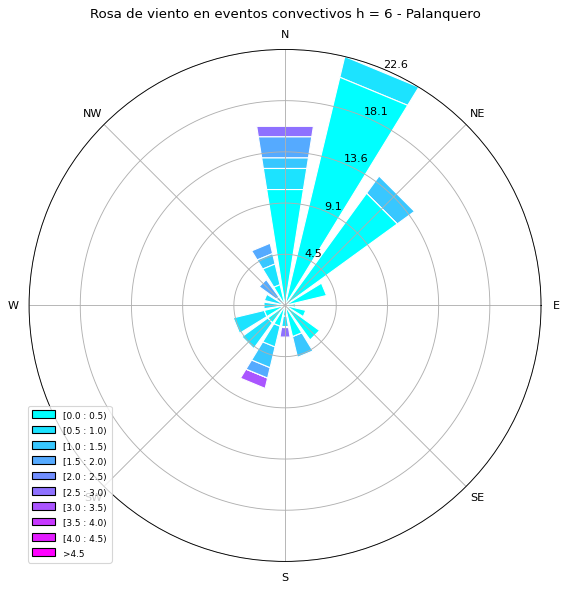

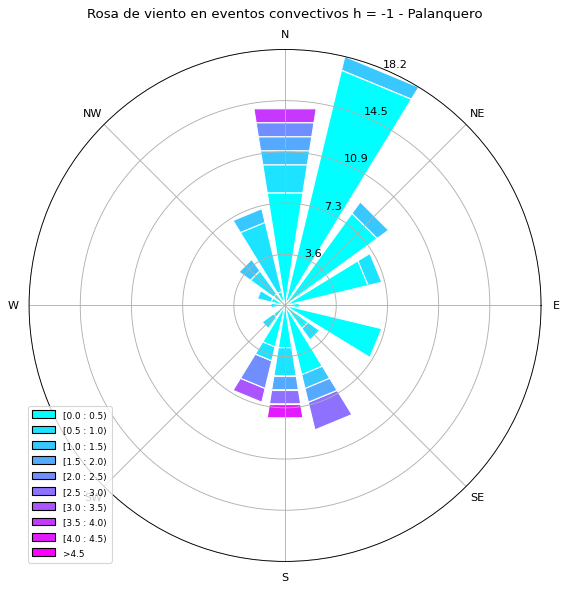

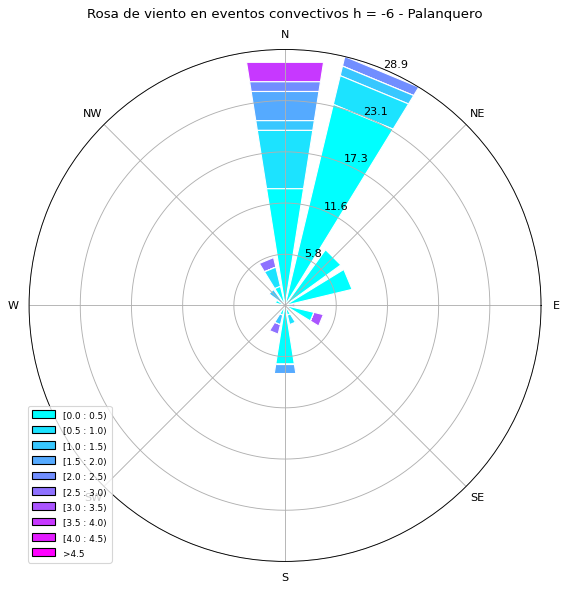

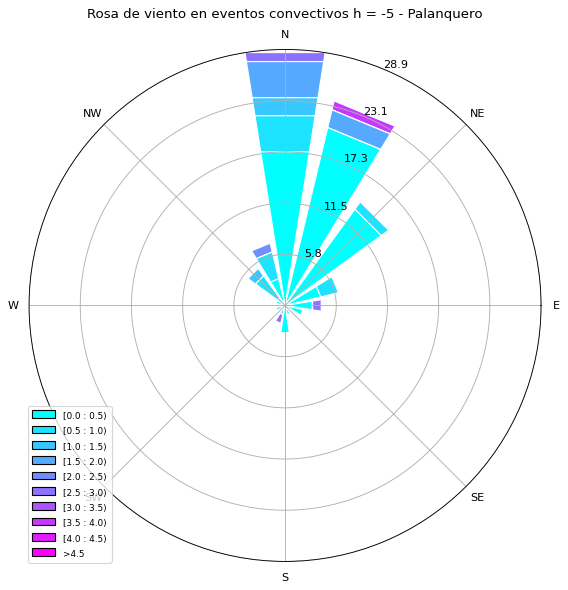

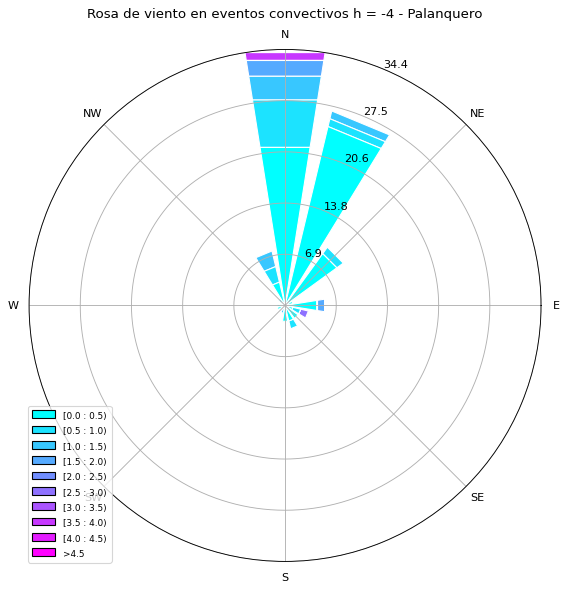

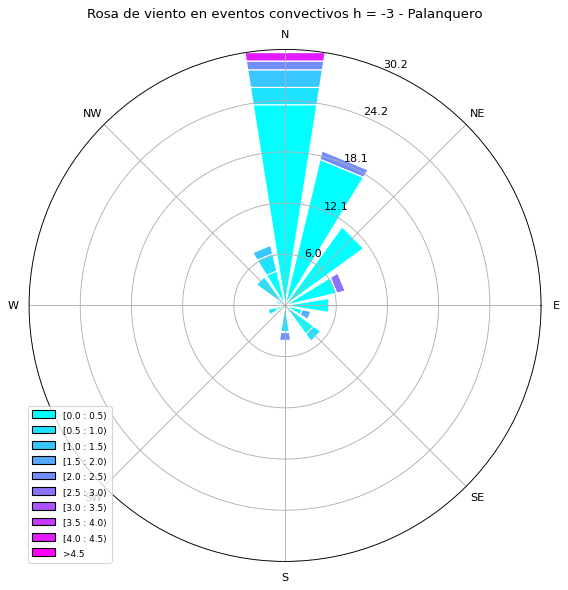

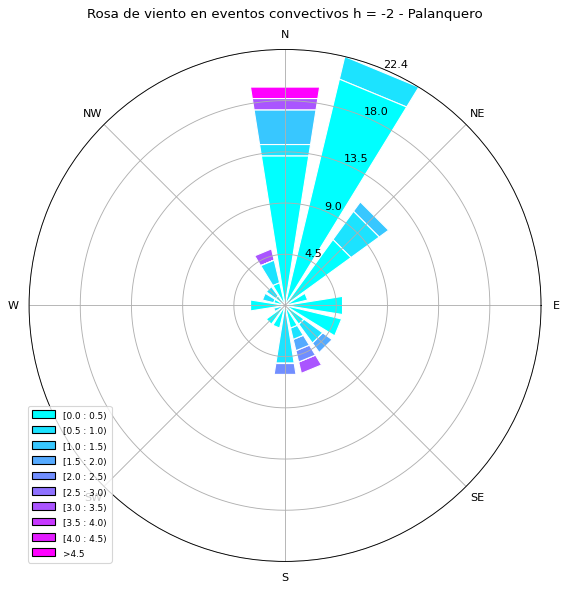

In [ ]:
for hora in posHoras:
  dft = dfCrossVientosHora.loc[dfCrossVientosHora['FECHA_POS'] == hora]
  title = f'Rosa de viento en eventos convectivos h = {int(hora)} - {NOMBRE_ESTACION.capitalize()}'
  path_to_save = f'windrose_eventos_convectivos_hora_20h_7h_{int(hora)}_{NOMBRE_ESTACION.lower()}.png'
    
  plot_windrose(dft, title, path_to_save)

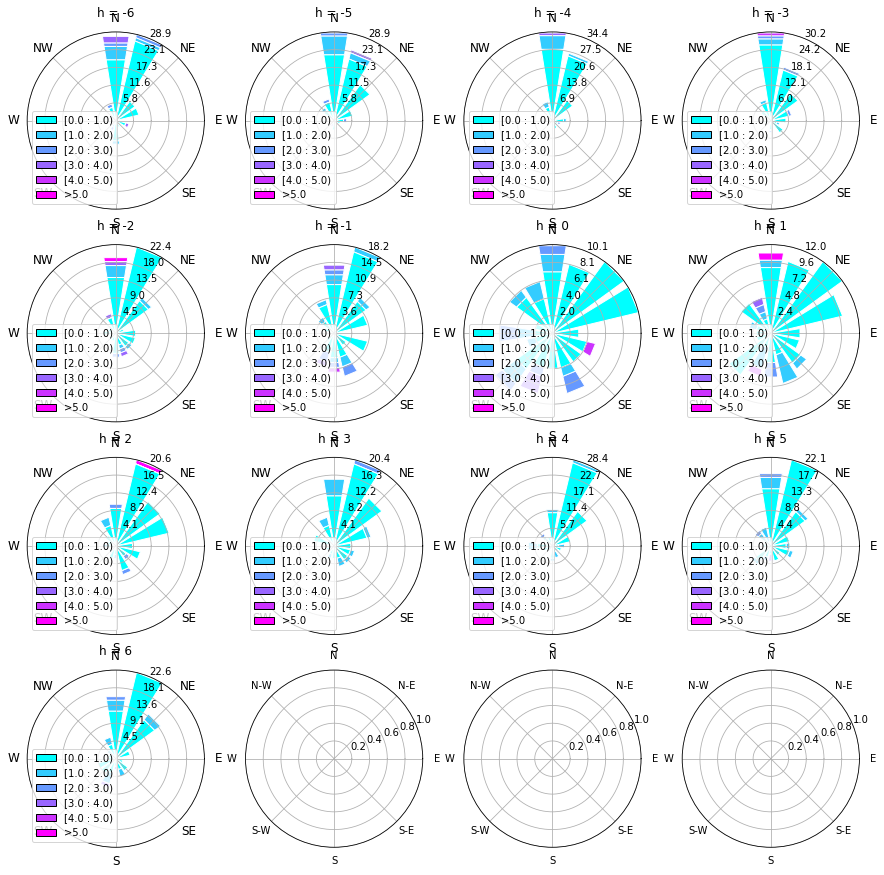

In [ ]:
def plot_windrose_2(df, title, ax):
  ax.bar(df['DIR_VIENTO'], df['VEL_VIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 6), edgecolor='white', cmap=cm.cool)
  ax.legend(loc = 3, fontsize= 10)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'], fontsize= 12)
  ax.set_title(title)


fig, axs = plt.subplots(4, 4,figsize=(15,15),  subplot_kw=dict(projection="windrose"))
horas = list(posHoras)
horas.sort()

for ax, hora in zip(axs.reshape(16), horas):
  dft = dfCrossVientosHora.loc[dfCrossVientosHora['FECHA_POS'] == hora]
  title = f'h = {int(hora)}'
  plot_windrose_2(dft, title, ax)

path_to_save = f'subplot_vientos_20h_7h_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )
plt.show()

# Gráficos multivariables en único Plot

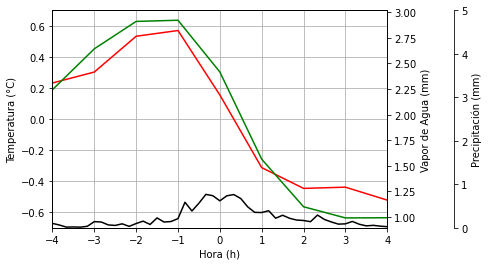

In [ ]:
fig, ax = plt.subplots()
ax.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('TEMP_anomalia', 'mean')], c = 'red')
ax.set_ylim(-0.7, 0.7)

ax2=ax.twinx()
ax2.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('PWV_anomalia', 'mean')], c = 'green')

ax3=ax.twinx()
ax3.spines['right'].set_position(('axes', 1.2))
ax3.plot(dfCrossPrecGroup['FECHA_POS']/60.0, dfCrossPrecGroup[('PREC', 'mean')], c = 'black')
ax3.set_ylim(0, 5)

ax.set_xlim(-4, 4)
ax.grid()

ax.set_ylabel("Temperatura (°C)")
ax2.set_ylabel("Vapor de Agua (mm)")
ax3.set_ylabel("Precipitación (mm)")
ax.set_xlabel("Hora (h)")

path_to_save = f'temp_vs_pwv_vs_prec_anomalias_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )

KeyError: ignored

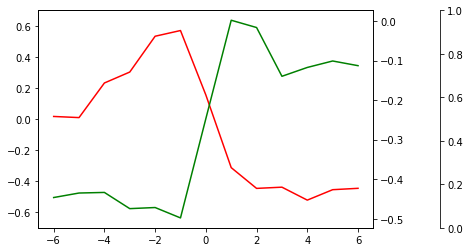

In [ ]:
fig, ax = plt.subplots()
ax.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('TEMP_anomalia', 'mean')], c = 'red')
ax.set_ylim(-0.7, 0.7)

ax2=ax.twinx()
ax2.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('PRESION_anomalia', 'mean')], c = 'green')

ax3=ax.twinx()
ax3.spines['right'].set_position(('axes', 1.2))
ax3.plot(dfCrossVientosGroup2['FECHA_POS']/60.0, dfCrossVientosGroup['VEL_VIENTO'], c = 'black')
# ax3.set_ylim(0, 0.5)

ax.set_xlim(-4, 4)
ax.grid()

ax.set_ylabel("Temperatura (°C)")
ax2.set_ylabel("Presión (hPa)")
ax3.set_ylabel("Velocidad del viento (m/s)")
ax.set_xlabel("Hora (h)")

path_to_save = f'temp_vs_pres_vs_velviento_anomalias_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )